# HACTIV8_Batch5 - Assignment 3

- Kode Peserta : PYTN-KS16-08
- Nama : Erwin Hariadi
- Datasource = https://archive.ics.uci.edu/dataset/222/bank+marketing

# Project Overview

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was requred, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
1. **bank-additional-full.csv** with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. **bank-additional.csv** with 10% of the examples (4119) randomly selected from 1, and 20 inputs
3. **bank-full.csv** with all examples and 17 inputs ordered by date (older version of this dataset with less inputs)
4. **bank.csv** with 10% of the examples and 17 inputs randomly selected from 3 (older version of this dataset with less inputs)

The smallest datasets are provided to test more computationally demanding machine learning algorthms (e.g, SVM)

The classification goal is to predct if the client will subscribe (yes/no) a term deposit (variable y).

This dataset contains:

Input variables:

**# bank client data:**

1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no', 'yes', 'unknown')
6. housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
7. loan: has personal loan? (categorical: 'no', 'yes', 'unknown')
#related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular', 'telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


**# other attributes:**

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')
#social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)


**# Output variable (desired target):**

21. y - has the client subscribed a term deposit? (binary: **'yes'**, **'no'**)

# Preprocessing Data

In [34]:
#import library
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [35]:
#membaca dataset
bank_data = pd.read_csv("bank-full.csv", delimiter=";")
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [36]:
#dimensi dataframe
bank_data.shape

(45211, 17)

In [37]:
#menampilkan info dari dataset
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [38]:
#mengecek statistik dataset
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [39]:
#megecek jumlah data duplikat
bank_data.duplicated().sum()

0

In [40]:
#megecek jumlah missing value
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Visualization

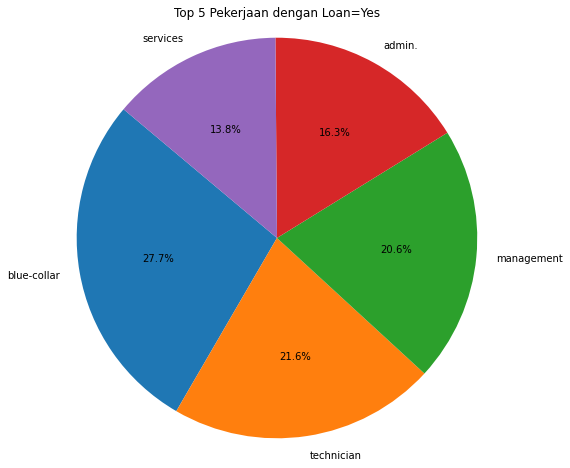

In [51]:
# Filter data hanya untuk mereka yang memiliki loan=yes
loan_yes_data = bank_data[bank_data['loan'] == 'yes']

# Hitung jumlah individu dalam setiap pekerjaan
job_counts = loan_yes_data['job'].value_counts()

# Ambil lima kategori pekerjaan teratas
top_5_jobs = job_counts.head(5)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_jobs, labels=top_5_jobs.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Pekerjaan dengan Loan=Yes')
plt.axis('equal')  # Memastikan lingkaran terlihat seperti lingkaran

# Menampilkan pie chart
plt.show()

#### Conclusion
Blue-Collar merupakan pekerjaan yang paling banyak memiliki pinjaman

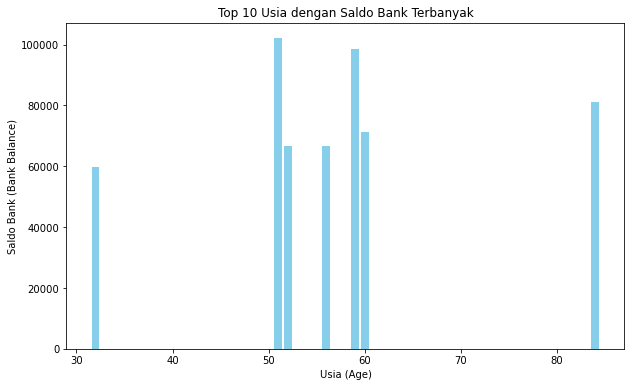

In [54]:
# Mengurutkan data berdasarkan saldo bank (bank balance) dalam urutan menurun
sorted_data = bank_data.sort_values(by='balance', ascending=False)

# Mengambil 10 usia teratas yang memiliki saldo bank terbanyak
top_10_age = sorted_data.head(10)

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_age['age'], top_10_age['balance'], color='skyblue')
plt.xlabel('Usia (Age)')
plt.ylabel('Saldo Bank (Bank Balance)')
plt.title('Top 10 Usia dengan Saldo Bank Terbanyak')
plt.show()

#### Conclusion
Pada rentang umur 50-60 memilki saldo bank terbanyak

# Correlation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


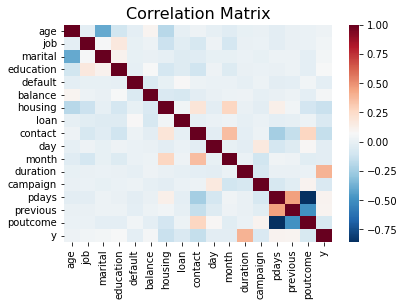

<Figure size 1440x1440 with 0 Axes>

In [56]:
# Mengubah tipe data object menjadi category
obj_col_list = bank_data.columns[bank_data.dtypes == 'object'].to_list()
for col in obj_col_list:
    bank_data[col] = bank_data[col].astype('category')
bank_data.info()

cat_col_list = bank_data.columns[bank_data.dtypes == 'category'].to_list()
for col in cat_col_list:
    bank_data[col] = preprocessing.LabelEncoder().fit_transform(bank_data[col])

x = bank_data.iloc[:, 0:16]
y = bank_data.iloc[:, -1]

corrmat = bank_data.corr()
sns.heatmap(bank_data[corrmat.index].corr(),cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.figure(figsize=(20, 20))
plt.show()

**Conclusion**
Dari hasil visualisasi heatmap, kolom duration memilki korelasi paling kuat terhadap y dibandingkan kolom lainnya

# Classification Model

In [57]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Logistic Regresion

In [59]:
#model
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

#result
accuracyLR = accuracy_score(y_test, pred_test)
print("Accuracy Score :",accuracyLR,"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

Accuracy Score : 0.8881598348569744 

Confusion Matrix :
 [[11713   253]
 [ 1264   334]] 

Classfication Report :
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.57      0.21      0.31      1598

    accuracy                           0.89     13564
   macro avg       0.74      0.59      0.62     13564
weighted avg       0.86      0.89      0.86     13564



### KNN

In [60]:
#model
model = KNeighborsClassifier()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

#result
accuracyKNN = accuracy_score(y_test, pred_test)
print("Accuracy Score :",accuracyKNN,"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

Accuracy Score : 0.8795340607490416 

Confusion Matrix :
 [[11504   462]
 [ 1172   426]] 

Classfication Report :
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     11966
           1       0.48      0.27      0.34      1598

    accuracy                           0.88     13564
   macro avg       0.69      0.61      0.64     13564
weighted avg       0.86      0.88      0.86     13564



### SVM

In [61]:
#model
model = svm.SVC()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

#result
accuracySVM = accuracy_score(y_test, pred_test)
print("Accuracy Score :",accuracySVM,"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

Accuracy Score : 0.8821881450899439 

Confusion Matrix :
 [[11956    10]
 [ 1588    10]] 

Classfication Report :
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     11966
           1       0.50      0.01      0.01      1598

    accuracy                           0.88     13564
   macro avg       0.69      0.50      0.47     13564
weighted avg       0.84      0.88      0.83     13564



### Decision Tree

In [62]:
#model
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

#result
accuracyDT = accuracy_score(y_test, pred_test)
print("Accuracy Score :",accuracyDT,"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

Accuracy Score : 0.8730462990268357 

Confusion Matrix :
 [[11131   835]
 [  887   711]] 

Classfication Report :
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     11966
           1       0.46      0.44      0.45      1598

    accuracy                           0.87     13564
   macro avg       0.69      0.69      0.69     13564
weighted avg       0.87      0.87      0.87     13564



### Random Forest

In [63]:
#model
model = RandomForestClassifier()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

#result
accuracyRF = accuracy_score(y_test, pred_test)
print("Accuracy Score :",accuracyRF,"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

Accuracy Score : 0.902241226776762 

Confusion Matrix :
 [[11563   403]
 [  923   675]] 

Classfication Report :
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     11966
           1       0.63      0.42      0.50      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.69      0.73     13564
weighted avg       0.89      0.90      0.89     13564



### Naive Bayes

In [64]:
#model
model = GaussianNB()
model.fit(x_train, y_train)
pred_test=model.predict(x_test)

#result
accuracyNB = accuracy_score(y_test, pred_test)
print("Accuracy Score :",accuracyNB,"\n")
matrix=confusion_matrix(y_test, pred_test)
print("Confusion Matrix :\n",matrix,"\n")
print("Classfication Report :\n",classification_report(y_test, pred_test))

Accuracy Score : 0.8320554408728988 



Confusion Matrix :
 [[10568  1398]
 [  880   718]] 

Classfication Report :
               precision    recall  f1-score   support

           0       0.92      0.88      0.90     11966
           1       0.34      0.45      0.39      1598

    accuracy                           0.83     13564
   macro avg       0.63      0.67      0.64     13564
weighted avg       0.85      0.83      0.84     13564



### Kesimpulan

In [65]:
print("Accuracy Score from Classification Model")
print(f"Accuracy Score on Logistic Regression:\t\t{accuracyLR}")
print(f"Accuracy Score on K-Nearest Neighbors (KNN):\t{accuracyKNN}")
print(f"Accuracy Score on Support Vector Machine (SVM):\t{accuracySVM}")
print(f"Accuracy Score on Decision Tree:\t\t{accuracyDT}")
print(f"Accuracy Score on Random Forest:\t\t{accuracyRF}")
print(f"Accuracy Score on Naive Bayes:\t\t\t{accuracyNB}")

Accuracy Score from Classification Model
Accuracy Score on Logistic Regression:		0.8881598348569744
Accuracy Score on K-Nearest Neighbors (KNN):	0.8795340607490416
Accuracy Score on Support Vector Machine (SVM):	0.8821881450899439
Accuracy Score on Decision Tree:		0.8730462990268357
Accuracy Score on Random Forest:		0.902241226776762
Accuracy Score on Naive Bayes:			0.8320554408728988


Model algoritma yang paling sesuai untuk dataset tersebut adalah Random Forest dikarenakan memiliki accuracy score yang tinggi yaitu 0.902241226776762 dibandingkan model algoritma lainnya